<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/demo_hpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 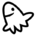 deepdriver quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver & requirement package for train

In [24]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-tools 1.51.1 requires protobuf<5.0dev,>=4.21.6, but you have protobuf 3.19.6 which is incompatible.


In [25]:
pip install deepdriver==0.4.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-4.21.12-cp37-abi3-manylinux2014_x86_64.whl (409 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tensorflow-metadata 1.12.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.12 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.


In [3]:
pip install protobuf==3.20.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.12
    Uninstalling protobuf-4.21.12:
      Successfully uninstalled protobuf-4.21.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
grpcio-tools 1.51.1 requires protobuf<5.0dev,>=4.21.6, but you have protobuf 3.20.0 which is incompatible.
googleapis-common-protos 1.57.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is i

#1. ➕ import deepdriver & deeplearnig framework



In [4]:
import tensorflow as tf

In [5]:
import deepdriver

#2. prepare dataset

In [6]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2023-01-12 04:23:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   122MB/s    in 0.5s    

2023-01-12 04:23:45 (122 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [7]:
import os
import zipfile
import shutil

train_dir = '/content/cat_dog/'
if os.path.isdir(train_dir):
  shutil.rmtree(train_dir)
  os.mkdir(train_dir)
else:
  os.mkdir(train_dir)

model_dir = '/content/model'

if os.path.isdir(model_dir):
  shutil.rmtree(model_dir)
  os.mkdir(model_dir)
else:
  os.mkdir(model_dir)
local_zip = '/tmp/cats_and_dogs_filtered.zip'
data_dir ='/tmp/cats_and_dogs_filtered/train'
data_doc_dir='/tmp/cats_and_dogs_filtered/train/dogs'
data_cat_dir='/tmp/cats_and_dogs_filtered/train/cats'
valid_dir ='/tmp/cats_and_dogs_filtered/validation'
data_dog_valid_dir='/tmp/cats_and_dogs_filtered/validation/dogs'
data_cat_valid_dir='/tmp/cats_and_dogs_filtered/validation/cats'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [8]:
# train용 폴더 생성
train_set_dir = os.path.join(train_dir, 'train_set')
os.mkdir(train_set_dir)
train_dog_dir = os.path.join(train_set_dir, 'dog')
os.mkdir(train_dog_dir)
train_cat_dir = os.path.join(train_set_dir, 'cat')
os.mkdir(train_cat_dir)
# valid용 폴더 생성
valid_set_dir = os.path.join(train_dir, 'valid_set')
os.mkdir(valid_set_dir)
valid_dog_dir = os.path.join(valid_set_dir, 'dog')
os.mkdir(valid_dog_dir)
valid_cat_dir = os.path.join(valid_set_dir, 'cat')
os.mkdir(valid_cat_dir)
# test용 폴더 생성
test_set_dir = os.path.join(train_dir, 'test_set')
os.mkdir(test_set_dir)
test_dog_dir = os.path.join(test_set_dir, 'dog')
os.mkdir(test_dog_dir)
test_cat_dir = os.path.join(test_set_dir, 'cat')
os.mkdir(test_cat_dir)

In [9]:
# image file name list 생성
import shutil
total_data_count =1000
train_data_count =int(total_data_count*0.8)
test_data_count = int(total_data_count*0.1)
valid_data_count =total_data_count - train_data_count -test_data_count
dog_files = [f'dog.{i}.jpg' for i in range(total_data_count)]
cat_files = [f'cat.{i}.jpg' for i in range(total_data_count)]

 
# 각 폴더로 image 이동
for file in dog_files[:train_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(train_dog_dir, file)
    shutil.move(src, dst)
    
for file in dog_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(valid_dog_dir, file)
    shutil.move(src, dst)
 
for file in dog_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(test_dog_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[:train_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(train_cat_dir, file)
    shutil.move(src, dst)
    
for file in cat_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(valid_cat_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(test_cat_dir, file)
    shutil.move(src, dst)

In [10]:
train_cat_fnames = os.listdir( train_cat_dir )
train_dog_fnames = os.listdir( train_dog_dir )

In [11]:
print('Total training cat images :', len(os.listdir(train_cat_dir)))
print('Total training dog images :', len(os.listdir(train_dog_dir)))

print('Total validation cat images :', len(os.listdir(valid_cat_dir)))
print('Total validation dog images :', len(os.listdir(valid_dog_dir)))


print('Total test cat images :', len(os.listdir(test_cat_dir)))
print('Total test dog images :', len(os.listdir(test_dog_dir)))

Total training cat images : 800
Total training dog images : 800
Total validation cat images : 100
Total validation dog images : 100
Total test cat images : 100
Total test dog images : 100


#2. ⚙ deepdriver server setting

In [12]:
deepdriver.setting(http_host="54.180.86.146:9011" ,grpc_host="54.180.86.146:19051")

#3. 🔌 log in to deepdriver

In [13]:
deepdriver.login(key="ZmIyNWQxNGJkMzUxYTVjODQ2NjM5NTgzOTM0YTM2OGE2ZmJiY2M2MWMwOWQ0OWFkNjU2YzNkM2UxMjA0YTVkZg==")

True

#4. 🥼 create hpo

In [17]:
experiment_name="cat_dog_cnn_hpo8"

In [18]:
hpo_configuration = {
    "metric": {"name": "accuracy", "goal": "maximize"},
    "method": "grid",
    "parameters": {
        "batch_size": {
            "values": [32,64,128]
        },
        "learning_rate": {
            "range": [0.01, 0.001]
        },
        "hidden_layer":{
            "values": [32,64,128]
        },
        "epoch" :{
            "values": [5,10]
        }

    }
}

In [19]:
# experiment init & config hyperparam
deepdriver.create_hpo(exp_name= experiment_name,hpo_config= hpo_configuration)

HPO initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo8
Exp Url=/experi/molamola.python/cat_dog_cnn_hpo8/exp/chart


[I 2023-01-12 04:24:13,368] A new study created in RDB with name: molamola.python_cat_dog_cnn_hpo8


('success', 517)

#5. 📚 train your code and send log

make model

In [20]:
def define_model(hidden_layer, learning_rate):

  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(hidden_layer, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  from tensorflow.keras.optimizers import RMSprop

  model.compile(optimizer=RMSprop(lr=learning_rate),
            loss='binary_crossentropy',
            metrics = ['accuracy'])
  return model

In [21]:
def prepare_data(batch_size):
  from tensorflow.keras.preprocessing.image import ImageDataGenerator

  train_datagen = ImageDataGenerator( rescale = 1.0/255. )
  test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
  valid_datagen  = ImageDataGenerator( rescale = 1.0/255. )

  train_generator = train_datagen.flow_from_directory(train_set_dir,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
  validation_generator =  valid_datagen.flow_from_directory(valid_set_dir,
                                                        batch_size=batch_size,
                                                        class_mode  = 'binary',
                                                        target_size = (150, 150))

  test_generator =  test_datagen.flow_from_directory(test_set_dir,
                                                        batch_size=batch_size,
                                                        class_mode  = 'binary',
                                                        target_size = (150, 150))
  return train_generator, validation_generator, test_generator

In [22]:
def train():
  import tensorflow as tf 
  print(deepdriver.config.Items())
  model = define_model(deepdriver.config.hidden_layer, deepdriver.config.learning_rate)
  
  train_generator, validation_generator, test_generator = prepare_data(deepdriver.config.batch_size)

  class CustomCallback(tf.keras.callbacks.Callback):

    # def on_train_end(self, logs=None):
    #     keys = list(logs.keys())
    #     deepdriver.finish()

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        deepdriver.log({"acc": logs["accuracy"], "loss": logs["loss"], "val_acc": logs["val_accuracy"], "val_loss": logs["val_loss"]})
        #deepdriver.log(logs)

  steps_per_epoch = train_generator.n//deepdriver.config.batch_size
  validation_steps = validation_generator.n//deepdriver.config.batch_size

  history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=deepdriver.config.epoch,
                    validation_steps=validation_steps ,
                    callbacks=[CustomCallback()],
                    verbose=2)
  result = model.evaluate(test_generator)
  result_dict =dict(zip(model.metrics_names, result))
  print(result_dict)
  return result_dict["accuracy"]


In [23]:
 deepdriver.run_hpo(exp_name=experiment_name, func=train, count=5)

DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo8
Run Name=run-1
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo8/run-1/run/chart
[('batch_size', 128), ('learning_rate', 0.0011047538408303686), ('hidden_layer', 64), ('epoch', 10)]


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
12/12 - 16s - loss: 0.9056 - accuracy: 0.5149 - val_loss: 0.6935 - val_accuracy: 0.4688 - 16s/epoch - 1s/step
Epoch 2/10
12/12 - 5s - loss: 0.6927 - accuracy: 0.5367 - val_loss: 0.6841 - val_accuracy: 0.5312 - 5s/epoch - 436ms/step
Epoch 3/10
12/12 - 5s - loss: 0.6910 - accuracy: 0.5394 - val_loss: 0.6794 - val_accuracy: 0.5781 - 5s/epoch - 429ms/step
Epoch 4/10
12/12 - 5s - loss: 0.6830 - accuracy: 0.5747 - val_loss: 0.6939 - val_accuracy: 0.4766 - 5s/epoch - 427ms/step
Epoch 5/10
12/12 - 5s - loss: 0.6622 - accuracy: 0.6114 - val_loss: 0.6940 - val_accuracy: 0.5781 - 5s/epoch - 433ms/step
Epoch 6/10
12/12 - 5s - loss: 0.6586 - accuracy: 0.5965 - val_loss: 0.6468 - val_accuracy: 0.6797 - 5s/epoch - 426ms/step
Epoch 7/10
12/12 - 5s - loss: 0.6343 - accuracy: 0.6698 - val_loss: 0.6278 - val_accuracy: 0.6875 - 5s/epoch - 425ms/step
Epoch 8/10
12/12 - 5s -

[I 2023-01-12 04:26:06,001] Trial 0 finished with value: 0.6600000262260437 and parameters: {'batch_size': 128, 'learning_rate': 0.0011047538408303686, 'hidden_layer': 64, 'epoch': 10}. Best is trial 0 with value: 0.6600000262260437.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo8
Run Name=run-2
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo8/run-2/run/chart
[('batch_size', 32), ('learning_rate', 0.009175114278256138), ('hidden_layer', 64), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
50/50 - 6s - loss: 4.6905 - accuracy: 0.4963 - val_loss: 0.6889 - val_accuracy: 0.5729 - 6s/epoch - 126ms/step
Epoch 2/10
50/50 - 5s - loss: 0.7309 - accuracy: 0.5350 - val_loss: 0.6894 - val_accuracy: 0.5573 - 5s/epoch - 105ms/step
Epoch 3/10
50/50 - 5s - loss: 0.6966 - accuracy: 0.5731 - val_loss: 0.6742 - val_accuracy: 0.5573 - 5s/epoch - 105ms/step
Epoch 4/10
50/50 - 5s - loss: 0.7431 - accuracy: 0.5344 - val_loss: 0.6763 - val_accuracy: 0.5625 - 5s/epoch - 105ms/step
Epoch 5/10
50/50 - 5s - loss: 0.7149 - accuracy: 0.5981 - val_loss: 0.6730 - val_accuracy: 0.5208 - 5s/epoch 

[I 2023-01-12 04:27:23,500] Trial 1 finished with value: 0.5699999928474426 and parameters: {'batch_size': 32, 'learning_rate': 0.009175114278256138, 'hidden_layer': 64, 'epoch': 10}. Best is trial 0 with value: 0.6600000262260437.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo8
Run Name=run-3
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo8/run-3/run/chart
[('batch_size', 32), ('learning_rate', 0.00163762633605408), ('hidden_layer', 32), ('epoch', 5)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/5
50/50 - 6s - loss: 0.8530 - accuracy: 0.4981 - val_loss: 0.6951 - val_accuracy: 0.5104 - 6s/epoch - 125ms/step
Epoch 2/5
50/50 - 5s - loss: 0.6934 - accuracy: 0.4837 - val_loss: 0.6931 - val_accuracy: 0.5000 - 5s/epoch - 105ms/step
Epoch 3/5
50/50 - 5s - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6932 - val_accuracy: 0.4948 - 5s/epoch - 106ms/step
Epoch 4/5
50/50 - 5s - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4948 - 5s/epoch - 105ms/step
Epoch 5/5
50/50 - 5s - loss: 0.6932 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.4896 - 5s/epoch - 105ms

[I 2023-01-12 04:28:14,254] Trial 2 finished with value: 0.5049999952316284 and parameters: {'batch_size': 32, 'learning_rate': 0.00163762633605408, 'hidden_layer': 32, 'epoch': 5}. Best is trial 0 with value: 0.6600000262260437.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo8
Run Name=run-4
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo8/run-4/run/chart
[('batch_size', 64), ('learning_rate', 0.002629139847814598), ('hidden_layer', 64), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
25/25 - 6s - loss: 1.0901 - accuracy: 0.5044 - val_loss: 0.6920 - val_accuracy: 0.5260 - 6s/epoch - 251ms/step
Epoch 2/10
25/25 - 5s - loss: 0.6900 - accuracy: 0.5450 - val_loss: 0.6868 - val_accuracy: 0.5469 - 5s/epoch - 210ms/step
Epoch 3/10
25/25 - 5s - loss: 0.7233 - accuracy: 0.5638 - val_loss: 0.6662 - val_accuracy: 0.5469 - 5s/epoch - 208ms/step
Epoch 4/10
25/25 - 5s - loss: 0.6991 - accuracy: 0.5844 - val_loss: 0.6183 - val_accuracy: 0.6875 - 5s/epoch - 211ms/step
Epoch 5/10
25/25 - 5s - loss: 0.6212 - accuracy: 0.6587 - val_loss: 0.6474 - val_accuracy: 0.6094 - 5s/epoch 

[I 2023-01-12 04:29:26,470] Trial 3 finished with value: 0.6650000214576721 and parameters: {'batch_size': 64, 'learning_rate': 0.002629139847814598, 'hidden_layer': 64, 'epoch': 10}. Best is trial 3 with value: 0.6650000214576721.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo8
Run Name=run-5
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo8/run-5/run/chart
[('batch_size', 128), ('learning_rate', 0.005132137819414224), ('hidden_layer', 32), ('epoch', 5)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/5
12/12 - 6s - loss: 2.4497 - accuracy: 0.5027 - val_loss: 0.6917 - val_accuracy: 0.5156 - 6s/epoch - 515ms/step
Epoch 2/5
12/12 - 5s - loss: 0.6962 - accuracy: 0.4993 - val_loss: 0.6937 - val_accuracy: 0.4297 - 5s/epoch - 422ms/step
Epoch 3/5
12/12 - 5s - loss: 0.6932 - accuracy: 0.5026 - val_loss: 0.6922 - val_accuracy: 0.5391 - 5s/epoch - 429ms/step
Epoch 4/5
12/12 - 5s - loss: 1.6251 - accuracy: 0.5285 - val_loss: 0.7053 - val_accuracy: 0.4922 - 5s/epoch - 432ms/step
Epoch 5/5
12/12 - 5s - loss: 0.6971 - accuracy: 0.5190 - val_loss: 0.6949 - val_accuracy: 0.4766 - 5s/epoch - 424

[I 2023-01-12 04:30:12,130] Trial 4 finished with value: 0.5 and parameters: {'batch_size': 128, 'learning_rate': 0.005132137819414224, 'hidden_layer': 32, 'epoch': 5}. Best is trial 3 with value: 0.6650000214576721.


True